CocaCola sales seem to follow a cycle of four quarters (using quarterly data). We model the sales below.

In the linear model of seasonality:

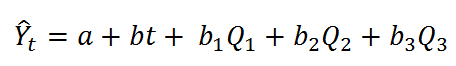

the coefficients of the dummy variables b1, b2 and b3 indicate how much each quarter differs from the reference quarter, quarter4.
The average increase from one quarter to the next is b (the coefficient of t). This is the trend effect.  Quarter 1 averages b1 units higher than the reference quarter, quarter 4, quarter 2 averages b2 units higher than quarter 4, etc. These other coefficients indicate the effect of seasonality. 


In what follows we are implementing a multiplicative seasonal model of seasonality:


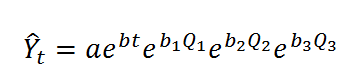

Which after taking logs is:

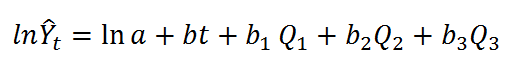

In this multiplicative model the coefficients are percentage changes in the original sales variable Y.  The coefficient of time means that deseasonalized sales increase by b% per quarter. This is the trend effect. The coefficients b1, b2 and b3 mean that the sales in quarters 1, 2 and 3 are respectively b1% above quarter 4, b2% above quarter 4 and b3% above quarter 4. Quarter 4 is the reference quarter.

In [6]:
dft = pd.read_csv('CocaCola.csv', parse_dates=['Date'], infer_datetime_format=True)
dft['datetime'] = pd.to_datetime(dft['Date'])
dft = dft.set_index('datetime')
dft.dropna(inplace=True) #make sure no Nans in dft
dft.drop(['Date'], axis=1, inplace=True)
dft.head()

,Sales
datetime,
1986-04-01,1734.83
1986-07-01,2244.96
1986-10-01,2533.80
1987-01-01,2154.96
1987-04-01,1547.82


C:\Users\loren\anaconda3\envs\py37\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


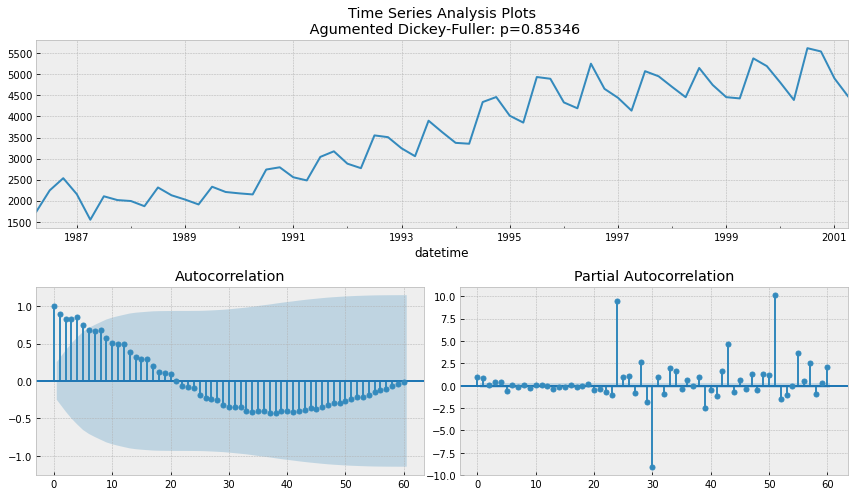

In [7]:
tsplot(dft.Sales, lags=60)

In [8]:
dft_detrended = detrendPrice(dft)
dft_detrended.head()

,Sales
datetime,
1986-04-01,67.844791
1986-07-01,514.806090
1986-10-01,740.477390
1987-01-01,298.468689
1987-04-01,-371.840012


C:\Users\loren\anaconda3\envs\py37\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


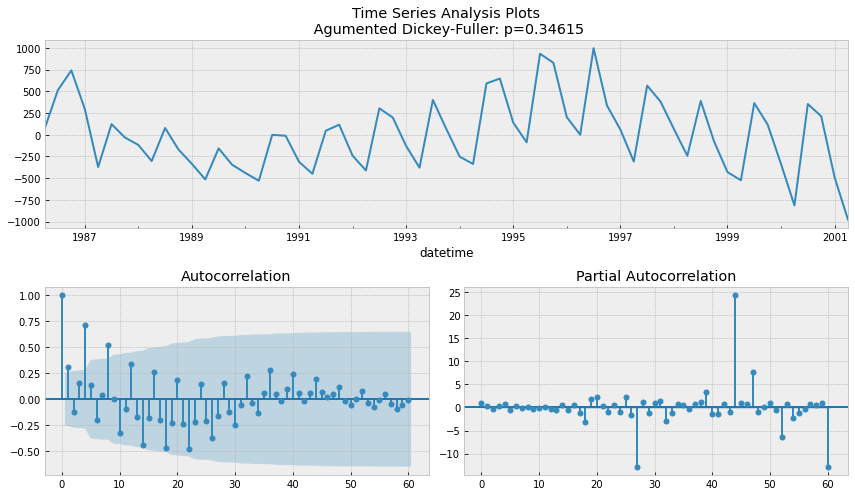

In [9]:
tsplot(dft_detrended.Sales, lags=60)
#seaonal cycle of 4 quarters, with quarterly data

Preparing the multiplicative seasonal model

In [10]:
dft["Sales"] = np.log(dft.Sales)

In [11]:

dft.head()

,Sales,quarter
datetime,,
1986-04-01,7.458665,2
1986-07-01,7.716443,3
1986-10-01,7.837475,4
1987-01-01,7.675527,1
1987-04-01,7.344603,2


In [12]:

df_dummies.head()

,quarter_1,quarter_2,quarter_3,quarter_4
datetime,,,,
1986-04-01,0,1,0,0
1986-07-01,0,0,1,0
1986-10-01,0,0,0,1
1987-01-01,1,0,0,0
1987-04-01,0,1,0,0


In [13]:

dft.head()

,Sales,quarter,quarter_1,quarter_2,quarter_3,quarter_4
datetime,,,,,,
1986-04-01,7.458665,2,0,1,0,0
1986-07-01,7.716443,3,0,0,1,0
1986-10-01,7.837475,4,0,0,0,1
1987-01-01,7.675527,1,1,0,0,0
1987-04-01,7.344603,2,0,1,0,0


In [14]:

dft.head()

,Sales,quarter_1,quarter_2,quarter_3
datetime,,,,
1986-04-01,7.458665,0,1,0
1986-07-01,7.716443,0,0,1
1986-10-01,7.837475,0,0,0
1987-01-01,7.675527,1,0,0
1987-04-01,7.344603,0,1,0


In [15]:

dft.head()

,Sales,quarter_1,quarter_2,quarter_3,time
datetime,,,,,
1986-04-01,7.458665,0,1,0,0
1986-07-01,7.716443,0,0,1,1
1986-10-01,7.837475,0,0,0,2
1987-01-01,7.675527,1,0,0,3
1987-04-01,7.344603,0,1,0,4


In [16]:
y = dft.dropna().Sales
X = dft.dropna().drop(['Sales'], axis=1)

In [17]:

print("train MAD Mean Ratio", MAD_mean_ratio(y_train,predictions_train))
print("test MAD Mean Ratio", MAD_mean_ratio(y_test,predictions_test))
coefs = pd.DataFrame(lr.coef_, X_train.columns)
print(coefs.head())
print("intercept: ",lr.intercept_)

train MAD Mean Ratio 0.7513756334676799
test MAD Mean Ratio 2.512772960778986
                  0
quarter_1 -0.097880
quarter_2 -0.174323
quarter_3  0.040285
time       0.022881
intercept:  7.535619009659956


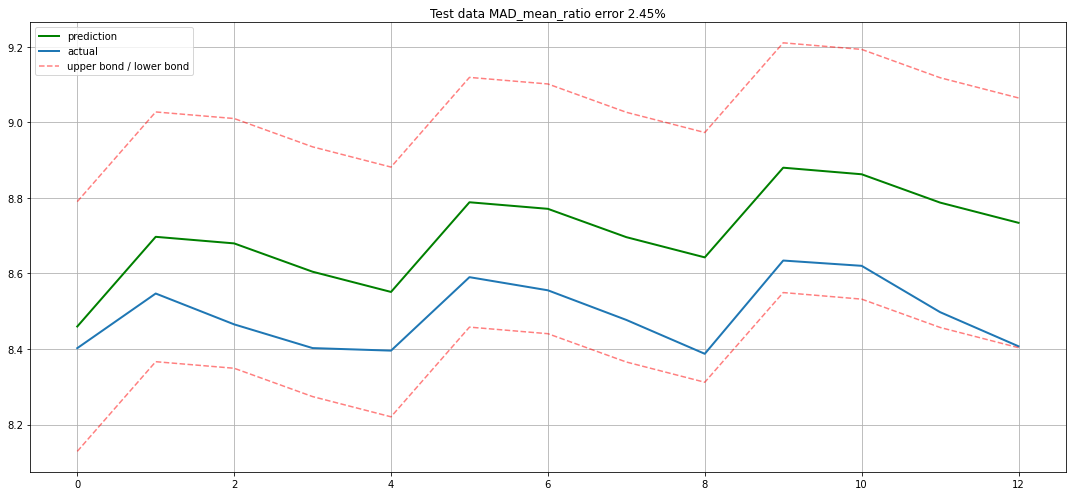

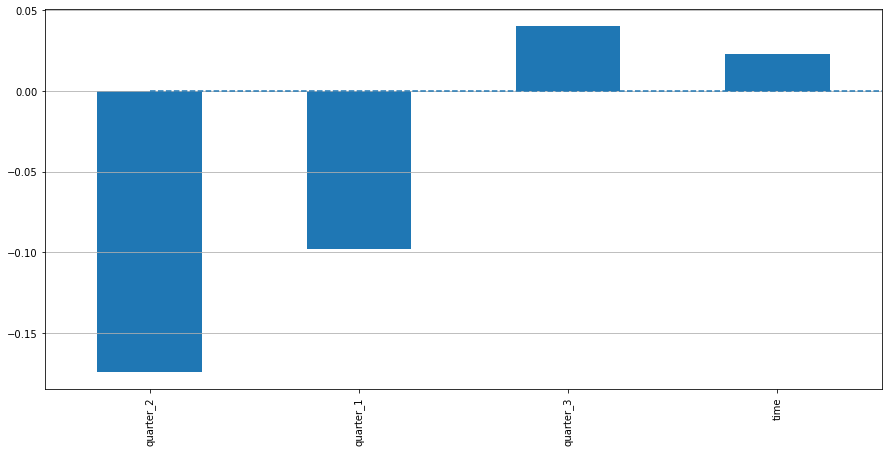

In [18]:
plotModelResults(lr, X_train=X_train, X_test=X_test, y_test=y_test, plot_intervals=True, test_data=True)
plotCoefficients(lr,X_train)


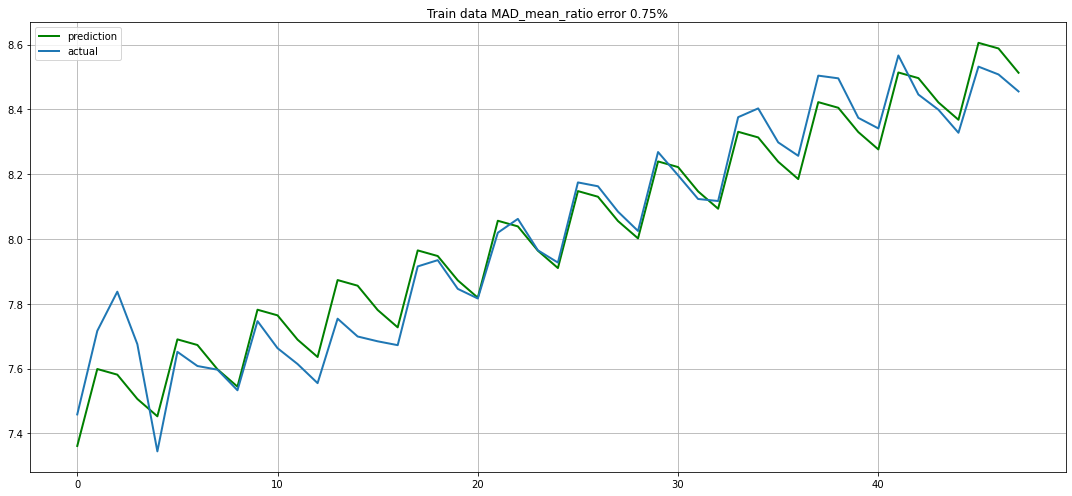

In [19]:
#interpolation with train data linear regression
plotModelResults(lr, X_train=X_train, X_test=X_train, y_test=y_train, plot_intervals=False, test_data=False)

Ridge Regression with Grid Search

In [20]:


print("Train set MAD mean ratio score: {:.2f}".format(train_score))
print("Test set MAD mean ratio score: {:.2f}".format(test_score))

coefs = pd.DataFrame(best_ridge.coef_, X_train.columns)
print(coefs.head())
print("intercept: ",best_ridge.intercept_)

best alpha:  5
Train set MAD mean ratio score: 0.83
Test set MAD mean ratio score: 1.75
                  0
quarter_1 -0.032799
quarter_2 -0.066097
quarter_3  0.020962
time       0.287134
intercept:  8.015348104518013


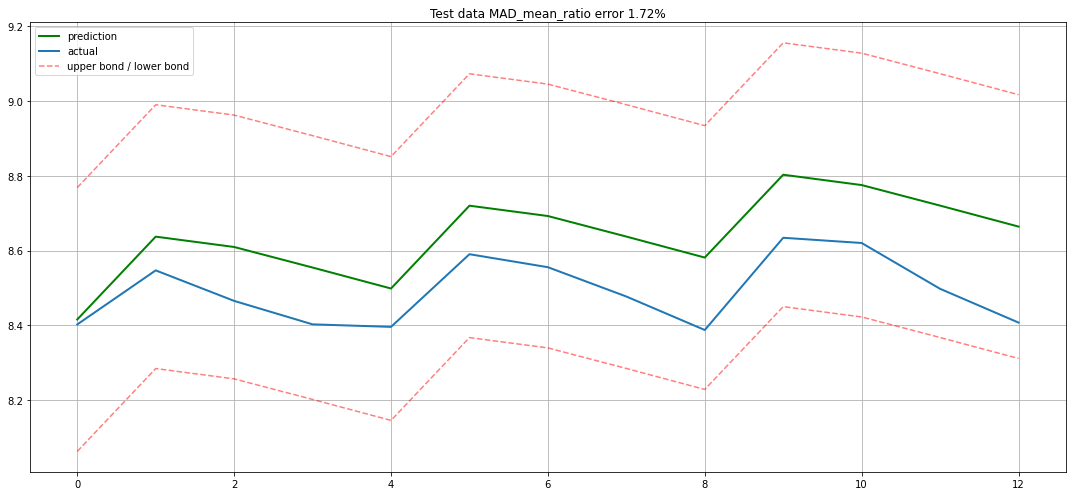

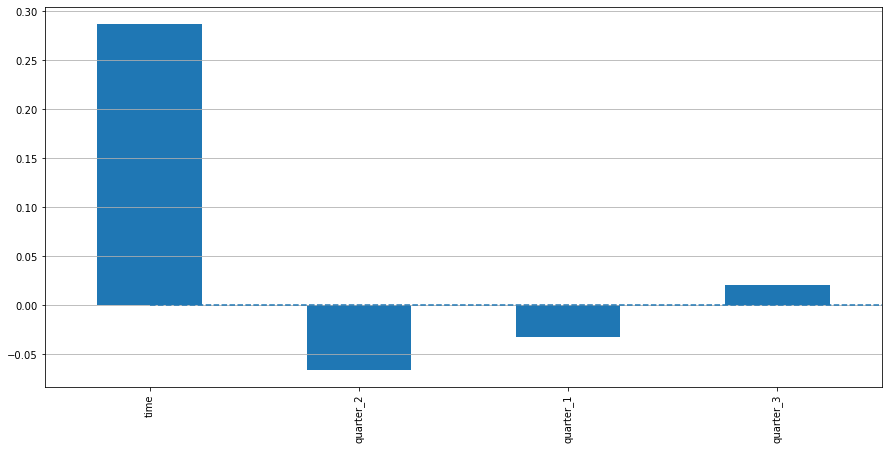

In [21]:
plotModelResults(best_ridge, X_train=X_train_s, X_test=X_test_s, y_test=y_test, plot_intervals=True, test_data=True)
plotCoefficients(best_ridge,X_train) #X_train is sent in just to get column names

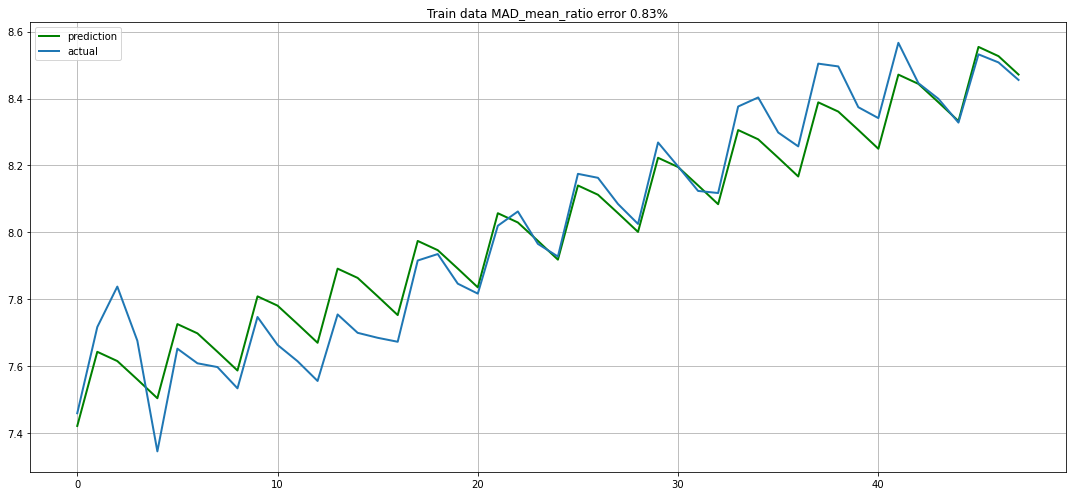

In [22]:
#interpolation with train data Ridge regression
plotModelResults(best_ridge, X_train=X_train_s, X_test=X_train_s, y_test=y_train, plot_intervals=False, test_data=False)

CONDA LIST

In [ ]:

(py37) C:\Users\loren>conda list
# packages in environment at C:\Users\loren\anaconda3\envs\py37:
#
# Name                    Version                   Build  Channel
_py-xgboost-mutex         2.0                       cpu_0    anaconda
_tflow_select             2.2.0                     eigen
absl-py                   0.10.0                   py37_0
alabaster                 0.7.12                   py37_0
argh                      0.26.2                   py37_0
argon2-cffi               20.1.0           py37he774522_1
astor                     0.8.1                    py37_0
astroid                   2.4.2                    py37_0
async_generator           1.10             py37h28b3542_0
atomicwrites              1.4.0                      py_0
attrs                     20.2.0                     py_0
autopep8                  1.5.4                      py_0
babel                     2.8.0                      py_0
backcall                  0.2.0                      py_0
bcrypt                    3.2.0            py37he774522_0
blas                      1.0                         mkl
bleach                    3.2.1                      py_0
blinker                   1.4                      py37_0
brotlipy                  0.7.0           py37he774522_1000
ca-certificates           2020.6.20            hecda079_0    conda-forge
cachetools                4.1.1                      py_0
certifi                   2020.6.20        py37hc8dfbb8_0    conda-forge
cffi                      1.14.3           py37h7a1dbc1_0
chardet                   3.0.4                 py37_1003
click                     7.1.2                      py_0
cloudpickle               1.6.0                      py_0
colorama                  0.4.3                      py_0
cplex                     12.10                    py37_0    ibmdecisionoptimization
cryptography              3.1.1            py37h7a1dbc1_0
cvxopt                    1.2.5                    pypi_0    pypi
cvxpy                     1.0.25           py37h6538335_2    conda-forge
cvxpy-base                1.0.25           py37h6538335_2    conda-forge
cycler                    0.10.0                   py37_0
decorator                 4.4.2                      py_0
defusedxml                0.6.0                      py_0
diff-match-patch          20200713                   py_0
dill                      0.3.2              pyh9f0ad1d_0    conda-forge
docutils                  0.16                     py37_1
ecos                      2.0.7.post1      py37h44b1f71_2    conda-forge
entrypoints               0.3                      py37_0
fastcache                 1.1.0            py37h8055547_1    conda-forge
flake8                    3.8.3                      py_0
freetype                  2.10.2               hd328e21_0
future                    0.18.2                   py37_1
gast                      0.2.2                    py37_0
google-auth               1.21.3                     py_0
google-auth-oauthlib      0.4.1                      py_2
google-pasta              0.2.0                      py_0
graphviz                  2.38                 hfd603c8_2
grpcio                    1.31.0           py37he7da953_0
h5py                      2.10.0           py37h5e291fa_0
hdf5                      1.10.4               h7ebc959_0
icc_rt                    2019.0.0             h0cc432a_1
icu                       58.2                 ha925a31_3
idna                      2.10                       py_0
imageio                   2.9.0                    pypi_0    pypi
imagesize                 1.2.0                      py_0
importlib-metadata        1.7.0                    py37_0
importlib_metadata        1.7.0                         0
intel-openmp              2019.0                   pypi_0    pypi
intervaltree              3.1.0                      py_0
ipykernel                 5.3.4            py37h5ca1d4c_0
ipython                   7.18.1           py37h5ca1d4c_0
ipython_genutils          0.2.0                    py37_0
ipywidgets                7.5.1                      py_0
isort                     5.5.3                    py37_0
jedi                      0.17.1                   py37_0
jinja2                    2.11.2                     py_0
joblib                    0.16.0                     py_0
jpeg                      9b                   hb83a4c4_2
jsonschema                3.2.0                    py37_1
jupyter                   1.0.0                    py37_7
jupyter_client            6.1.6                      py_0
jupyter_console           6.2.0                      py_0
jupyter_core              4.6.3                    py37_0
jupyterlab_pygments       0.1.1                      py_0
keras                     2.2.4                         0
keras-applications        1.0.8                      py_1
keras-base                2.2.4                    py37_0
keras-preprocessing       1.1.0                      py_1
keyring                   21.4.0                   py37_0
kiwisolver                1.2.0            py37h74a9793_0
lazy-object-proxy         1.4.3            py37he774522_0
libblas                   3.8.0           8_h8933c1f_netlib    conda-forge
libiconv                  1.15                 h1df5818_7
liblapack                 3.8.0           8_h8933c1f_netlib    conda-forge
libpng                    1.6.37               h2a8f88b_0
libprotobuf               3.13.0               h200bbdf_0
libsodium                 1.0.18               h62dcd97_0
libspatialindex           1.9.3                h33f27b4_0
libtiff                   4.1.0                h56a325e_1
libxgboost                0.90                          1    anaconda
libxml2                   2.9.10               h464c3ec_1
libxslt                   1.1.34               he774522_0
lightgbm                  3.0.0            py37h1834ac0_1    conda-forge
lxml                      4.5.2            py37h1350720_0
lz4-c                     1.9.2                h62dcd97_1
m2w64-gcc-libgfortran     5.3.0                         6
m2w64-gcc-libs            5.3.0                         7
m2w64-gcc-libs-core       5.3.0                         7
m2w64-gmp                 6.1.0                         2
m2w64-libwinpthread-git   5.0.0.4634.697f757               2
markdown                  3.2.2                    py37_0
markupsafe                1.1.1            py37hfa6e2cd_1
matplotlib                3.3.1                         0
matplotlib-base           3.3.1            py37hba9282a_0
mccabe                    0.6.1                    py37_1
mglearn                   0.1.9                    pypi_0    pypi
mistune                   0.8.4           py37hfa6e2cd_1001
mkl                       2019.0                   pypi_0    pypi
mkl-service               2.3.0            py37hb782905_0
mkl_fft                   1.2.0            py37h45dec08_0
mkl_random                1.1.1            py37h47e9c7a_0
msys2-conda-epoch         20160418                      1
multiprocess              0.70.10          py37h4ab8f01_0    conda-forge
multitasking              0.0.9                    pypi_0    pypi
nbclient                  0.5.0                      py_0
nbconvert                 6.0.6                    py37_0
nbformat                  5.0.7                      py_0
nest-asyncio              1.4.0                      py_1
notebook                  6.1.1                    py37_0
numpy                     1.19.1           py37h5510c5b_0
numpy-base                1.19.1           py37ha3acd2a_0
numpydoc                  1.1.0                      py_0
oauthlib                  3.1.0                      py_0
olefile                   0.46                     py37_0
openssl                   1.1.1h               he774522_0    conda-forge
opt_einsum                3.1.0                      py_0
osqp                      0.6.1            py37h3bbf574_2    conda-forge
packaging                 20.4                       py_0
pandas                    1.1.1            py37ha925a31_0
pandas-datareader         0.9.0                      py_0
pandoc                    2.10.1                        0
pandocfilters             1.4.2                    py37_1
paramiko                  2.7.2                      py_0
parso                     0.7.0                      py_0
pathtools                 0.1.2                      py_1
patsy                     0.5.1                    py37_0
pexpect                   4.8.0                    py37_1
pickleshare               0.7.5                 py37_1001
pillow                    7.2.0            py37hcc1f983_0
pip                       20.2.2                   py37_0
pluggy                    0.13.1                   py37_0
prometheus_client         0.8.0                      py_0
prompt-toolkit            3.0.7                      py_0
prompt_toolkit            3.0.7                         0
protobuf                  3.13.0           py37h6538335_0
psutil                    5.7.2            py37he774522_0
py-xgboost                0.90                     py37_1    anaconda
pyasn1                    0.4.8                      py_0
pyasn1-modules            0.2.8                      py_0
pycodestyle               2.6.0                      py_0
pycparser                 2.20                       py_2
pydocstyle                5.1.1                      py_0
pydotplus                 2.0.2                      py_3
pyflakes                  2.2.0                      py_0
pygments                  2.7.1                      py_0
pyjwt                     1.7.1                    py37_0
pylint                    2.6.0                    py37_0
pynacl                    1.4.0            py37h62dcd97_1
pyopenssl                 19.1.0                     py_1
pyparsing                 2.4.7                      py_0
pyportfolioopt            1.2.6                    pypi_0    pypi
pyqt                      5.9.2            py37h6538335_2
pyreadline                2.1                      py37_1
pyrsistent                0.17.3           py37he774522_0
pysocks                   1.7.1                    py37_1
python                    3.7.9                h60c2a47_0
python-dateutil           2.8.1                      py_0
python-jsonrpc-server     0.4.0                      py_0
python-language-server    0.35.1                     py_0
python_abi                3.7                     1_cp37m    conda-forge
pytz                      2020.1                     py_0
pywin32                   227              py37he774522_1
pywin32-ctypes            0.2.0                 py37_1001
pywinpty                  0.5.7                    py37_0
pyyaml                    5.3.1            py37he774522_1
pyzmq                     19.0.2           py37ha925a31_1
qdarkstyle                2.8.1                      py_0
qt                        5.9.7            vc14h73c81de_0
qtawesome                 0.7.2                      py_0
qtconsole                 4.7.7                      py_0
qtpy                      1.9.0                      py_0
requests                  2.24.0                     py_0
requests-oauthlib         1.3.0                      py_0
rope                      0.17.0                     py_0
rsa                       4.6                        py_0
rtree                     0.9.4            py37h21ff451_1
scikit-learn              0.23.2           py37h47e9c7a_0
scipy                     1.5.2            py37h9439919_0
scs                       2.1.2            py37h1d7f02c_1    conda-forge
seaborn                   0.11.0                     py_0
send2trash                1.5.0                    py37_0
setuptools                49.6.0                   py37_0
sip                       4.19.8           py37h6538335_0
six                       1.15.0                     py_0
snowballstemmer           2.0.0                      py_0
sortedcontainers          2.2.2                      py_0
sphinx                    3.2.1                      py_0
sphinxcontrib-applehelp   1.0.2                      py_0
sphinxcontrib-devhelp     1.0.2                      py_0
sphinxcontrib-htmlhelp    1.0.3                      py_0
sphinxcontrib-jsmath      1.0.1                      py_0
sphinxcontrib-qthelp      1.0.3                      py_0
sphinxcontrib-serializinghtml 1.1.4                      py_0
spyder                    4.1.5                    py37_0
spyder-kernels            1.9.4                    py37_0
sqlite                    3.33.0               h2a8f88b_0
statsmodels               0.11.1           py37he774522_0
ta-lib                    0.4.18                   pypi_0    pypi
tensorboard               2.2.1              pyh532a8cf_0
tensorboard-plugin-wit    1.6.0                      py_0
tensorflow                1.15.0          eigen_py37h9f89a44_0
tensorflow-base           1.15.0          eigen_py37h07d2309_0
tensorflow-estimator      1.15.1             pyh2649769_0
termcolor                 1.1.0                    py37_1
terminado                 0.8.3                    py37_0
testpath                  0.4.4                      py_0
threadpoolctl             2.1.0              pyh5ca1d4c_0
tk                        8.6.10               he774522_0
toml                      0.10.1                     py_0
tornado                   6.0.4            py37he774522_1
traitlets                 4.3.3                    py37_0
typed-ast                 1.4.1            py37he774522_0
ujson                     3.2.0            py37ha925a31_0
urllib3                   1.25.10                    py_0
vc                        14.1                 h0510ff6_4
vs2015_runtime            14.16.27012          hf0eaf9b_3
watchdog                  0.10.3                   py37_0
wcwidth                   0.2.5                      py_0
webencodings              0.5.1                    py37_1
werkzeug                  0.16.1                     py_0
wheel                     0.35.1                     py_0
widgetsnbextension        3.5.1                    py37_0
win_inet_pton             1.1.0                    py37_0
wincertstore              0.2                      py37_0
winpty                    0.4.3                         4
wrapt                     1.11.2           py37he774522_0
xz                        5.2.5                h62dcd97_0
yaml                      0.2.5                he774522_0
yapf                      0.30.0                     py_0
yfinance                  0.1.54                   pypi_0    pypi
zeromq                    4.3.2                ha925a31_3
zipp                      3.1.0                      py_0
zlib                      1.2.11               h62dcd97_4
zstd                      1.4.5                h04227a9_0

(py37) C:\Users\loren>